In [1]:
name = '1RXSJ0603'

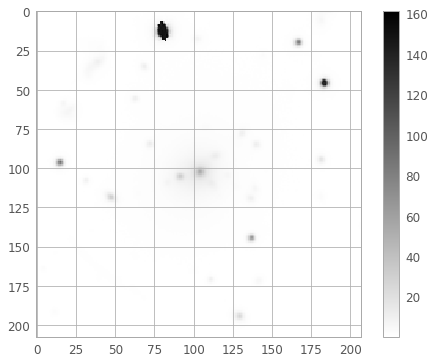

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
image_file = fits.open('%s.fits' % (name))
image_data = image_file[0].data
fig = plt.figure()
plt.imshow(image_data, cmap='gray_r')
plt.colorbar()
plt.show()
fig.savefig('%s.pdf' % (name))

In [3]:
size = image_data.shape
size

(208, 207)

In [4]:
def max_search(array,xmin,xmax,ymin,ymax):
    x_pos = xmin
    y_pos = ymin
    x_max_pos = 0
    y_max_pos = 0
    max = 0
    for y_pos in range(ymin, ymax + 1):
        for  x_pos in range(xmin, xmax + 1):
            if max <= array[x_pos,y_pos]:
                max = array[x_pos,y_pos]
                x_max_pos = x_pos
                y_max_pos = y_pos
    print "Max of %d at (%d,%d)\n" % (max, x_max_pos, y_max_pos)  
    return (max,x_max_pos,y_max_pos)
    

In [5]:
max_inf = max_search(image_data,(size[0]/2)-(size[0]/5),(size[0]/2)+(size[0]/5),(size[1]/2)-(size[1]/5),
                     (size[1]/2)+(size[1]/5))

Max of 63 at (144,137)



In [6]:
def circle_check(array,x0,y0,r):
    copy = array
    values = np.array([])
    median = np.array([])
    f = 1 - r
    x = 0
    y = r
    dx = 1
    dy = -2 * r
    
    values = np.append(values,array[x0 + r, y0])
    values = np.append(values,array[x0 - r, y0])  
    values = np.append(values,array[x0, y0 + r])
    values = np.append(values,array[x0, y0 - r])
    
    while x < y:
        if f >= 0:
            y -= 1
            dy += 2
            f += dy
        
        x += 1
        dx += 2
        f += dx
        
        values = np.append(values,array[x0 + x, y0 + y])
        values = np.append(values,array[x0 - x, y0 + y])
        values = np.append(values,array[x0 + x, y0 - y])
        values = np.append(values,array[x0 - x, y0 - y])
        values = np.append(values,array[x0 + y, y0 + x])
        values = np.append(values,array[x0 - y, y0 + x])
        values = np.append(values,array[x0 + y, y0 - x])
        values = np.append(values,array[x0 - y, y0 - x])
        
        '''
        copy[x0 + x, y0 + y] = 30000
        copy[x0 - x, y0 + y] = 30000 
        copy[x0 + x, y0 - y] = 30000
        copy[x0 - x, y0 - y] = 30000
        copy[x0 + y, y0 + x] = 30000 
        copy[x0 - y, y0 + x] = 30000
        copy[x0 + y, y0 - x] = 30000
        copy[x0 - y, y0 - x] = 30000
        '''
        
    #print values
    #print np.median(values)
    median = np.append(median,np.median(values))

    return median

In [7]:
image_medians = np.array([])
if size[0] > size[1]:
    max_r = size[1]/3
if size[0] <= size[1]:
    max_r = size[0]/3
for i in range(0,max_r):
    image_medians = np.append(image_medians,circle_check(image_data,max_inf[1],max_inf[2],i)/max_inf[0])
image_medians
    

IndexError: index 208 is out of bounds for axis 0 with size 208

In [ ]:
fig = plt.figure()
plt.plot(image_medians)
plt.show()
fig.savefig('%s_profile.pdf' % (name))